In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


# **انشاء كلاس النموذج**

In [2]:
class LinerCla(nn.Module):
  def __init__(self) -> None:
    super(LinerCla,self).__init__()
    self.wieghts = nn.Parameter(torch.rand(1),requires_grad=True)
    self.bais = nn.Parameter(torch.rand(1),requires_grad=True)

  def forward(self,input ):
      return torch.tensor(input) * self.wieghts + self.bais

# **انشاء مجموعة البيانات**

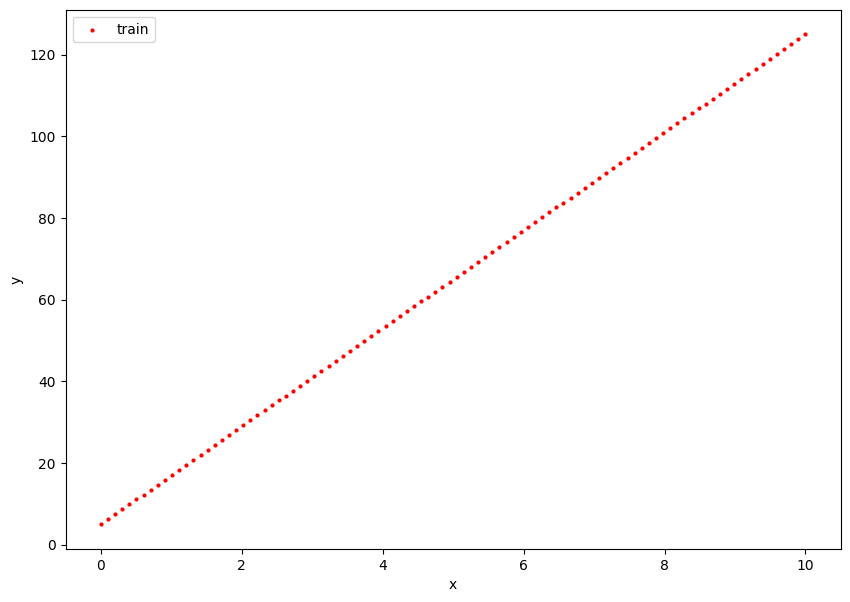

In [3]:
w = 12
b = 5
x = np.linspace(0,10,100)
y = x * w + b
plt.figure(figsize=(10,7))
plt.scatter(x,y,c='red',s=4,label="train")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# **تقسيم البيانات**

In [4]:
y_test = y[int(0.8*len(y)):]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*len(y))]
x_train = x[:int(0.8*len(x))]
len(y_test), len(x_test), len(y_train), len(x_train)

(20, 20, 80, 80)

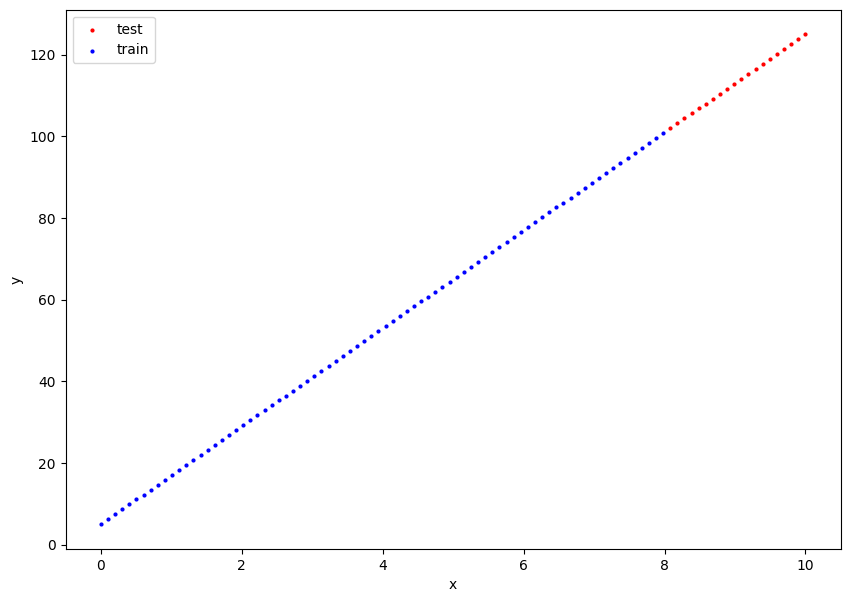

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,c='red',s=4,label="test")
plt.scatter(x_train,y_train,c='blue',s=4,label="train")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# **قبل تدريب النموذج**

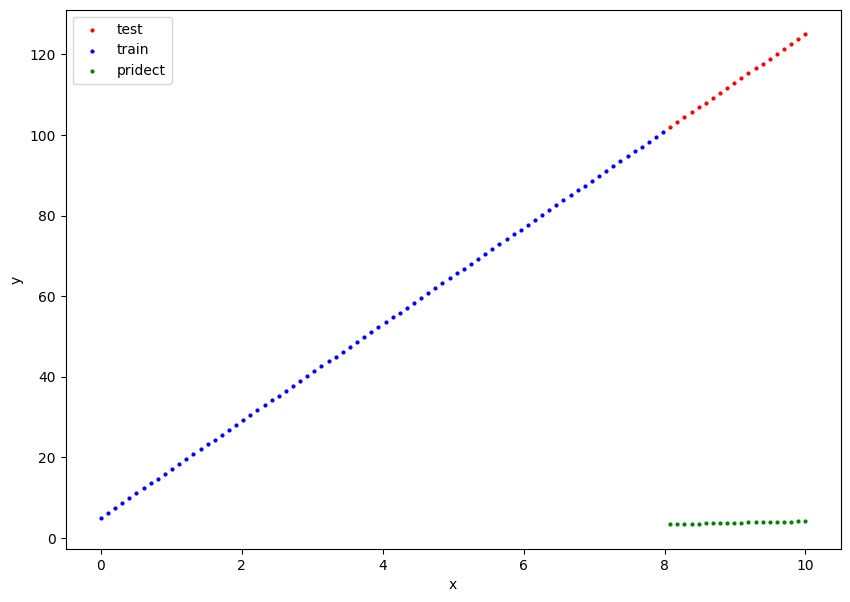

In [6]:
model0 = LinerCla()
y_predict = model0(x_test)
y_p = model0(x_test)
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,c='red',s=4,label="test")
plt.scatter(x_train,y_train,c='blue',s=4,label="train")
plt.scatter(x_test,y_predict.detach().numpy(),c='green',s=4,label="pridect")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# **تدريب النموذج**

In [7]:
torch.manual_seed(42)

model = LinerCla()
optimaizer = torch.optim.SGD(params=model.parameters(),lr=0.01)
loss_fn = nn.L1Loss()
epochs = 500

for epoch in range(epochs):
  model.train()
  optimaizer.zero_grad()
  y_predict = model(x_train)
  loss = loss_fn(y_predict, torch.tensor(y_train))
  loss.backward()
  optimaizer.step()

  model.eval()
  with torch.inference_mode():
    if(epoch % 100 == 0):
      y_predict = model(x_test)
      loss = loss_fn(y_predict, torch.tensor(y_test))
      print(f"epoch:{epoch}: loss is {loss:.4f}")


epoch:0: loss is 104.2231
epoch:100: loss is 67.1528
epoch:200: loss is 30.0827
epoch:300: loss is 0.7126
epoch:400: loss is 0.4603


In [15]:
model.state_dict()

OrderedDict([('wieghts', tensor([12.0657])), ('bais', tensor([4.6320]))])

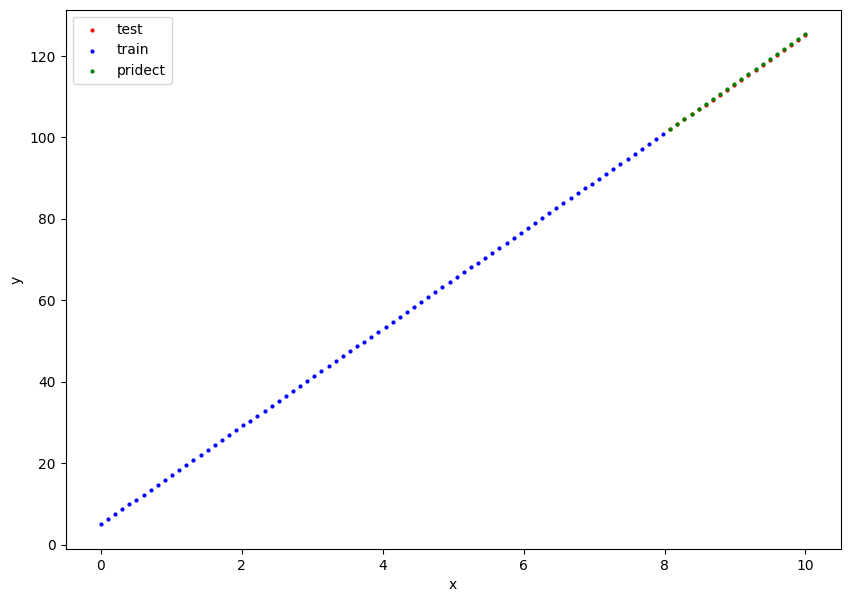

In [8]:
y_p = model(x_test)
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,c='red',s=4,label="test")
plt.scatter(x_train,y_train,c='blue',s=4,label="train")
plt.scatter(x_test,y_p.detach().numpy(),c='green',s=4,label="pridect")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# **اعادة تدريب النوذج باستخدام الكلاس Linear المقدم من torch**

In [9]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [10]:
start = 0
end = 10
step = 0.1
weight = 12
bias= 5
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(80, 80, 20, 20)

In [11]:
torch.manual_seed(42)

# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

# Set the number of epochs
epochs = 500


for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, Y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Train loss: 48.55006408691406 | Test loss: 104.36385345458984
Epoch: 100 | Train loss: 31.94754981994629 | Test loss: 68.01130676269531
Epoch: 200 | Train loss: 15.344958305358887 | Test loss: 31.65860366821289
Epoch: 300 | Train loss: 0.5130313634872437 | Test loss: 0.7402232885360718
Epoch: 400 | Train loss: 0.34379321336746216 | Test loss: 0.48768576979637146


In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[12.0749]])),
             ('linear_layer.bias', tensor([4.5823]))])

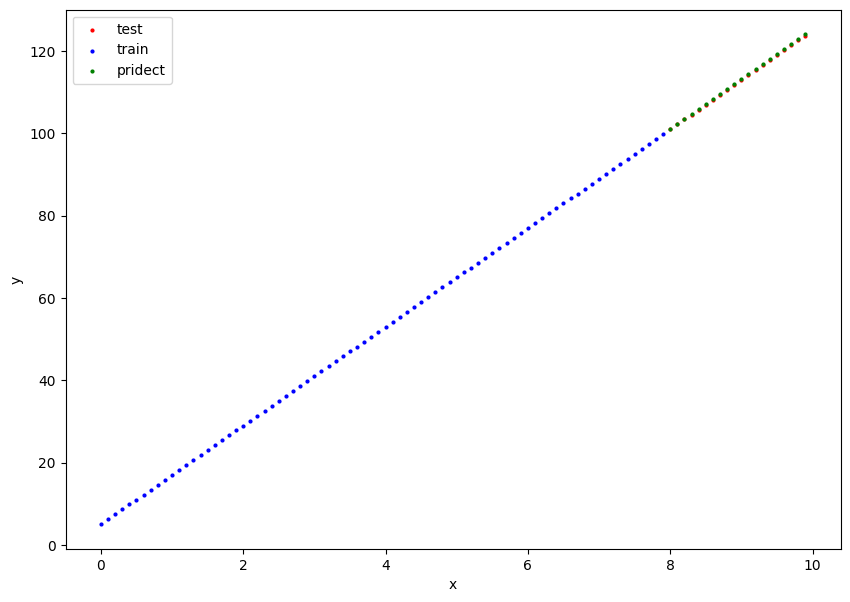

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,Y_test,c='red',s=4,label="test")
plt.scatter(X_train,Y_train,c='blue',s=4,label="train")
plt.scatter(X_test,test_pred.detach().numpy(),c='green',s=4,label="pridect")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()